# Bernstein-Vazirani Algorithm with Qiskit

In [1]:
# importing Qiskit
from qiskit import QuantumCircuit, Aer, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 3 # number of qubits used to represent c
c = '110'   # the hidden binary string

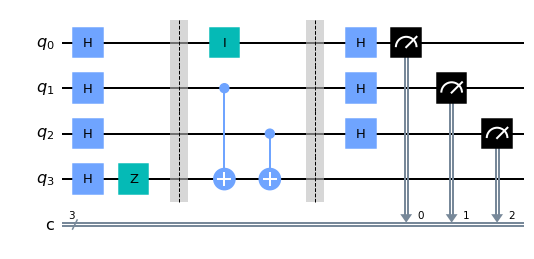

In [3]:
# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
c = c[::-1] # reverse c to fit qiskit's qubit ordering
for q in range(n):
    if c[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')



Total counts are: {'110': 1000}


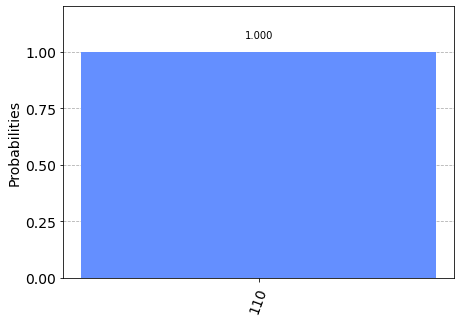

In [4]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(bv_circuit, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(bv_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

We can see that the result of the measurement is the hidden string c=110.